In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

## A Brief matplotlib API Primer

### Figures and Subplots

Plots in matplotlib reside within a **Figure** object.
Create a new figure with **plt.figure**:

**plt.figure()** has a number of options, notably **figsize** will guarantee the figure has a certain size and aspect ratio.

Use **plt.gcf()** to get a reference to the active figure

In [2]:
fig = plt.figure()

Create one or more **subplots** using **add_subplot**:

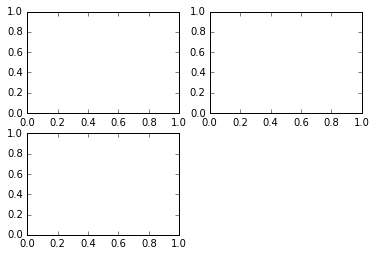

In [3]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.show()

When issue a plotting command like **plt.plot()**, matplotlib draws on the last figure and subplot used:

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = plt.plot(np.random.randn(50).cumsum(), "k--")


The objects returned by **fig.add_subplot()** are **AxesSubplot** objects. You can call each one's instance methods:

In [5]:
_ = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)
_ = ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

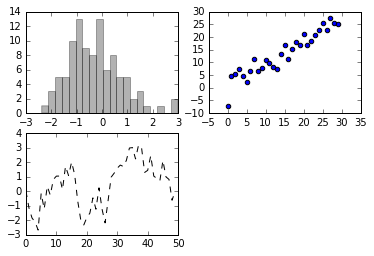

In [6]:
plt.show()

Alternatively, there is a convenience method, **plt.subplots**, that creates a new figure and returns a NumPy array containing the created subplot objects:

In [7]:
fig, axes = plt.subplots(2, 3)

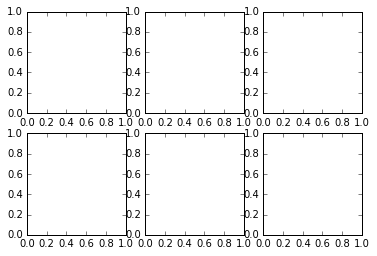

In [8]:
fig

In [9]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e0a5979d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3e0a378810>]], dtype=object)

**axes** can be easily indexed: **axes[0, 1]**

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. The spacing
can be most easily changed using the **plt.subplots_adjust()** Figure method:

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)       

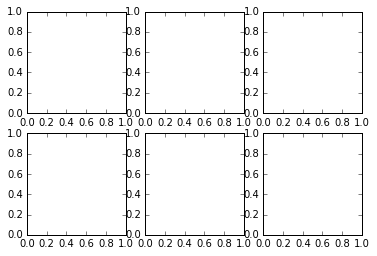

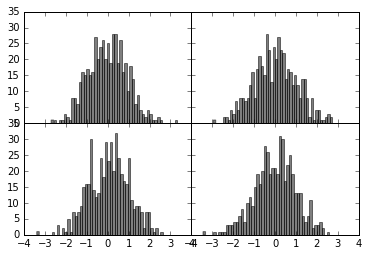

In [11]:
plt.show()

### Colors, Markers, and Line Styles

**ax.plot(x, y, "g--")**
or explicitly 
**ax.plot(x, y, linestyle="--", color="g")**

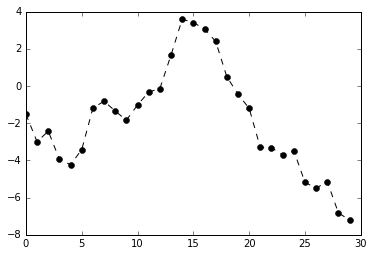

In [12]:
# Marker
plt.plot(np.random.randn(30).cumsum(), "ko--")
plt.show()

# or explicitly
# plot(np.random.randn(30).cumsum(), color="k", linestyle="dashed", marker="0")

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the drawstyle option:

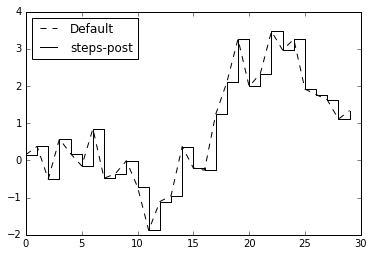

In [13]:
data = np.random.randn(30).cumsum()
plt.plot(data, "k--", label="Default")
plt.plot(data, "k-", drawstyle="steps-post", label="steps-post")
plt.legend(loc="best")
plt.show()

### Ticks, Labels, and Legends

**xlim()**, **xticks()**, **xticklabels()** control the plot range, tick locations, and tick labels, respectively

1. When called with no arguments returns the current parameter value: **plt.xlim()** returns the current X axis plotting range

2. Called with parameters sets the parameter value. So **plt.xlim([0, 10])**, sets the X axis range to 0 to 10

All such methods act on the active or most recently-created **AxesSubplot**. Each of them corresponds to two methods on the subplot object itself; in the case of **xlim** these are **ax.get_xlim()** and **ax.set_xlim()**. 

#### Setting the title, axis labels, ticks and ticklabels

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the X axis ticks, it's easiest to use **set_xticks()** and **set_xticklabels()**.

In [15]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize="small")

**set_xlabel()** gives a name to the X axis and **set_title** the subplot title:

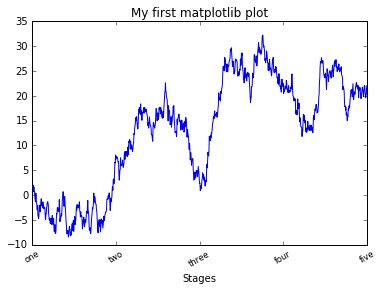

In [16]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
plt.show()

#### Adding legends

The easiest way to add legends is to pass the **label** argument when adding each piece of the plot:

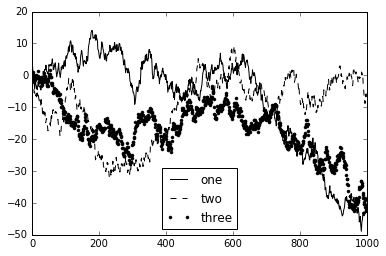

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), "k", label="one")
ax.plot(np.random.randn(1000).cumsum(), "k--", label="two")
ax.plot(np.random.randn(1000).cumsum(), "k.", label="three")
ax.legend(loc="best")
plt.show()

To **exclude** one or more elements from the legend, pass no label or **label="_nolegend_"**

### Annotations and Drawing on a Subplot

Annotations and text can be added using the **text**, **arrow**, and **annotate** functions.

**text** draws text at given coordinates **(x, y)** on the plot with optional custom styling:

**ax.text(x, y, "Hello, world!", family="monospace", fontsize=10)**

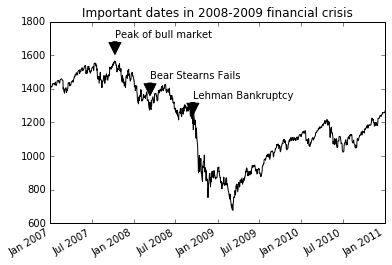

In [18]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, style="k-")

crisis_data = [(datetime(2007, 10, 11), "Peak of bull market"),
               (datetime(2008, 3, 12), "Bear Stearns Fails"),
               (datetime(2008, 9, 15), "Lehman Bankruptcy")]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor="black"),
                horizontalalignment="left", verticalalignment="top")
    
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in 2008-2009 financial crisis")
plt.show()

**Shapes**

matplotlib has objects that represent many　common shapes, referred to as *patches*. Some of these, like **Rectangle** and **Circle** are
found in **matplotlib.pyplot**, but the full set is located in **matplotlib.patches**.

To add a shape to a plot, you create the patch object **shp** and add it to a subplot by calling **ax.add_patch(shp)**

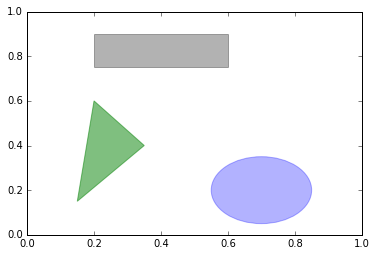

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="g", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

### Saving Plots to File

The active figure can be saved to file using **plt.savefig**. This method is equivalent to the figure object's savefig instance method.

For example:

**plt.savefig('figpath.svg')**

Specify dpi and margin size:

**plt.savefig('figpath.png', dpi=400, bbox_inches='tight')**

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a StringIO :

In [20]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

In [21]:
# Set the global default figure size to be 10 * 10
plt.rc("figure", figsize=(10, 10))

The first argument to **rc** is the component you wish to customize, such as **figure**, **axes**, **xtick**, **ytick**, **grid**, **legend**. After that can follow a sequence of keyword arguments indicating the new parameters.

In [22]:
font_options = {"family": "monospace",
                "weight": "bold",
                "size": 10.0}
plt.rc("font", **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file **matplotlibrc** in the **matplotlib/mpl-data** directory. If you customize this file and place it in your home directory titled **.matplotlibrc**, it will be loaded
each time you use matplotlib.

## Plotting Functions in pandas

### Line Plots

Series and DataFrame each have a **plot** method for making many different plot types. By default, they make line plots

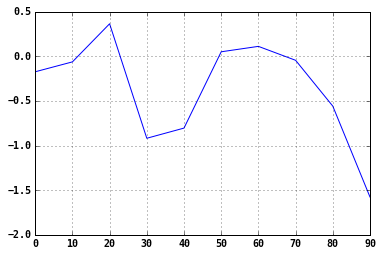

In [23]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
plt.grid()
plt.show()

The Series object's index is passed to matplotlib for plotting on the X axis, though this can be disabled by passing **use_index=False**. The X axis ticks and limits can be adjusted using the **xticks** and **xlim** options, and Y axis respectively using **yticks** and **ylim**.

DataFrame's **plot** method plots each of its columns as a different line on the same subplot, creating a legend automatically:

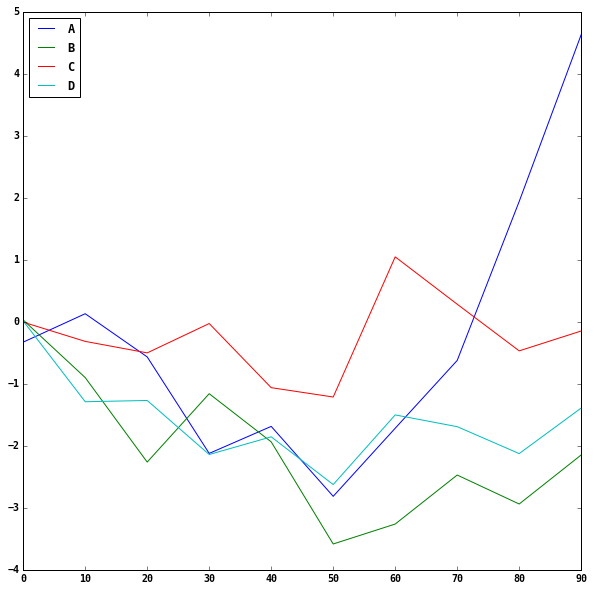

In [24]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=["A", "B", "C", "D"],
               index=np.arange(0, 100, 10))
df.plot()
plt.show()

### Bar Plots

Making bar plots instead of line plots is a simple as passing **kind='bar'** (for vertical bars) or **kind='barh'** (for horizontal bars). In this case, the Series or DataFrame index will be used as the X(**bar**) or Y(**barh**) ticks:

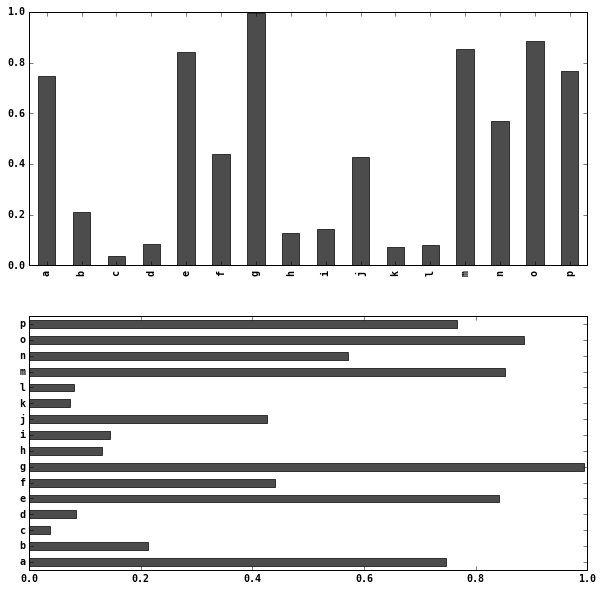

In [25]:
#Series

fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list("abcdefghijklmnop"))
data.plot(kind="bar", ax=axes[0], color="k", alpha=0.7)
data.plot(kind="barh", ax=axes[1], color="k", alpha=0.7)
plt.show()

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [26]:
df = DataFrame(np.random.rand(6, 4),
               index=["one", "two", "three", "four", "five", "six"],
               columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.284286,0.044028,0.559470,0.117631
two,0.741126,0.440675,0.824714,0.562659
three,0.387232,0.667715,0.184796,0.129205
four,0.443661,0.392692,0.085037,0.390983
five,0.112073,0.736251,0.459156,0.886598
six,0.487921,0.471591,0.127036,0.676836


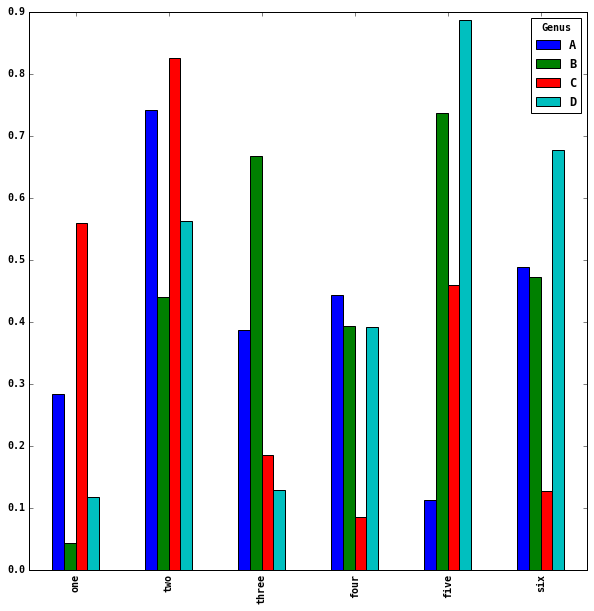

In [27]:
df.plot(kind="bar")
plt.show()

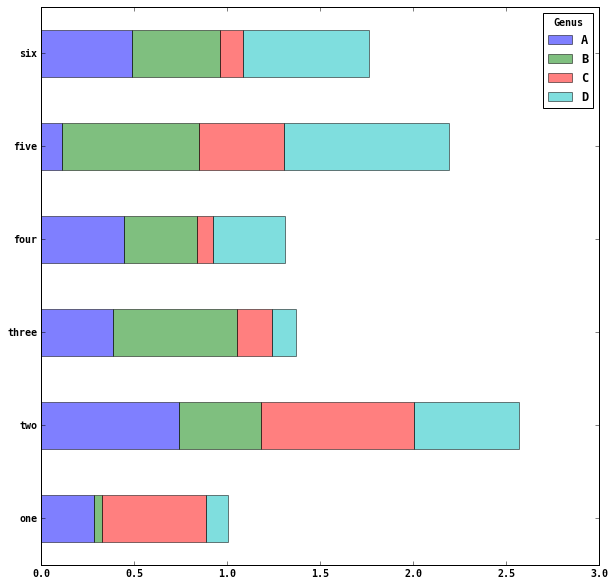

In [28]:
# Stacked bar plots
df.plot(kind="barh", stacked=True, alpha=0.5)
plt.show()

**Tips** dataset

In [29]:
tips = pd.read_csv("tips.csv")
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [30]:
# Not Many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [31]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


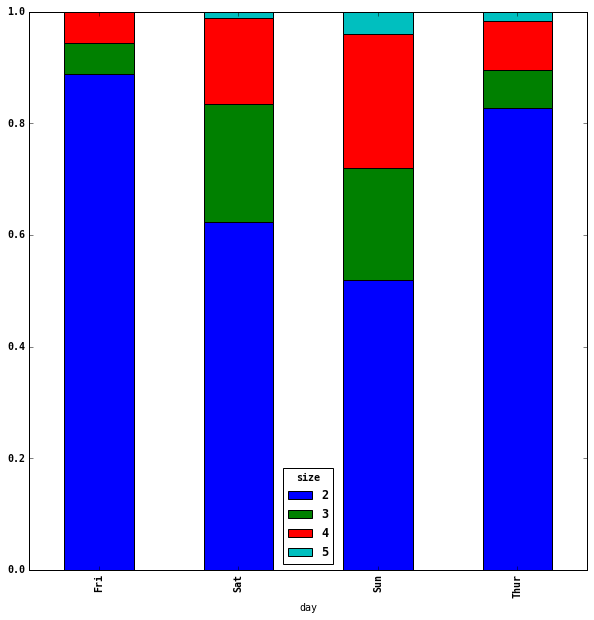

In [32]:
party_pcts.plot(kind="bar", stacked=True)
plt.show()

### Histograms and Density Plots

A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

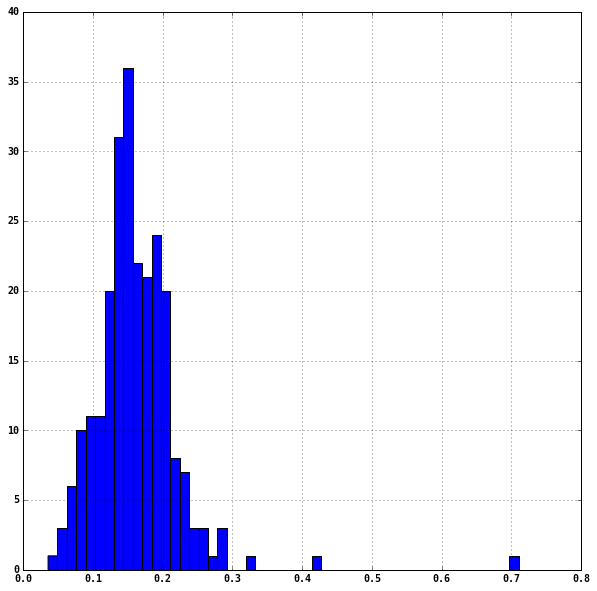

In [33]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips["tip_pct"].hist(bins=50)
plt.show()

A related plot type is a *density plot*, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. A usual procedure is to approximate this distribution as a mixture of **kernels**, that is, simpler distributions like the normal (Gaussian) distribution. Thus, density plots are also known as KDE (kernel density estimate) plots. Using **plot** with **kind='kde'** makes a density plot using the standard mixture-of-normals KDE:

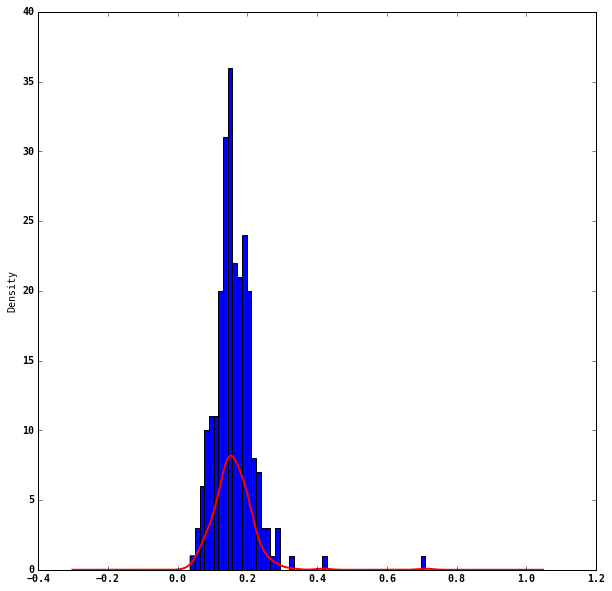

In [34]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips["tip_pct"].hist(bins=50)
tips["tip_pct"].plot(kind="kde",color="red", linewidth=2.0)
plt.show()

**Example**: bimodal distribution consisting of draws from two different standard normal distributions:

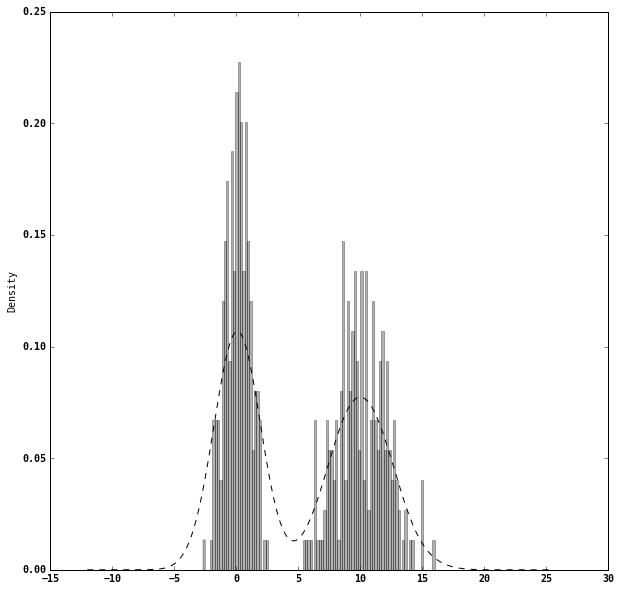

In [35]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color="k", normed=True)
values.plot(kind="kde", style="k--")
plt.show()

### Scatter Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional data series.

In [36]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


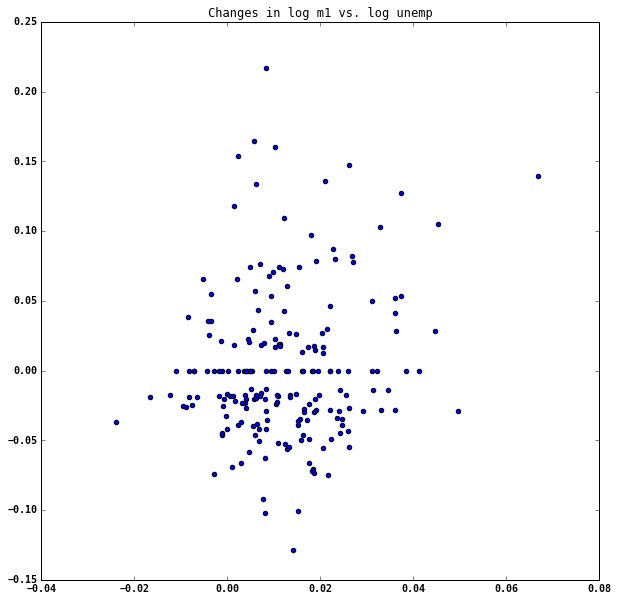

In [37]:
plt.scatter(trans_data["m1"], trans_data["unemp"])
plt.title("Changes in log %s vs. log %s" % ("m1", "unemp"))
plt.show()